In [ ]:
# dimensionality reduction and unsupervised clustering for EELS-SI
# Jinseok Ryu (jinseuk56@gmail.com)
# https://doi.org/10.1016/j.ultramic.2021.113314

In [2]:
from drca import drca
import tkinter.filedialog as tkf
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Cambria'

In [3]:
file_adr = []

In [4]:
# repeat this block to add other files
file_adr.extend(tkf.askopenfilenames())

In [ ]:
%matplotlib inline

In [5]:
# dat_dim: dimensions of hyperspectral data
# rescale: if True, each hyperspectral data will be divided by its maximum value
run_4DSTEM = DR_assisted_CA(file_adr, dat_dim=4, dat_unit='1/nm', rescale=False)

(128, 128, 128, 128)


[[63.0, 64.0]]


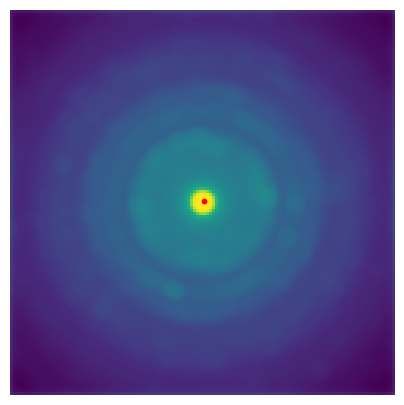

In [6]:
# find (and remove) the center of diffraction patterns
# cbox_edge: the edge length of the center box for finding the center position
# center_remove: if not zero, the center box specified by center_remove of each diffration pattern will be removed
# log_scale: if True, the intensities of each diffraction pattern will be converted into log-scale
run_4DSTEM.find_center(cbox_edge=7, center_remove=0, result_visual=True, log_scale=True)

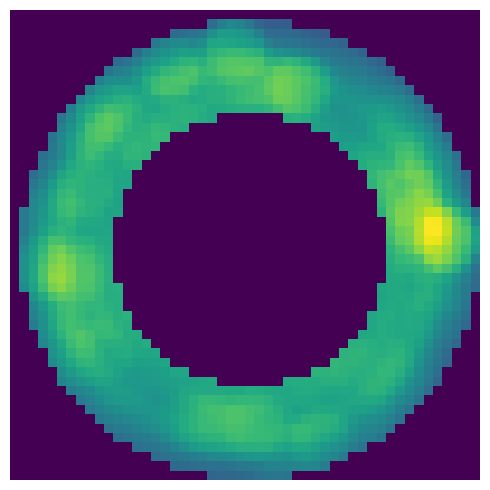

(128, 128, 1220)
(16384, 1220)
0.0009978641 1.0
0.0009978641 1.0


In [8]:
# prepare the input dataset (two options for flattening diffraction patterns)
# radial_flat: if True, each diffraction pattern will be flattened circle by circle for the radius range specified by radial_range
# radial_range: [start, end, step]
run_4DSTEM.make_input(min_val=0.0, max_normalize=True, 
           log_scale=False, radial_flat=True, 
           radial_range=[15, 25, 1])

Epoch 10 reached after 0.205 seconds, error: 490.875111
Epoch 20 reached after 0.361 seconds, error: 476.531757
Epoch 30 reached after 0.513 seconds, error: 471.889917
Epoch 40 reached after 0.683 seconds, error: 470.189191
Epoch 50 reached after 0.848 seconds, error: 469.419422
Epoch 60 reached after 1.025 seconds, error: 469.003715
Epoch 70 reached after 1.199 seconds, error: 468.744950
Epoch 80 reached after 1.361 seconds, error: 468.562763
Epoch 90 reached after 1.520 seconds, error: 468.425104
Epoch 100 reached after 1.672 seconds, error: 468.315732
Epoch 110 reached after 1.829 seconds, error: 468.225857
Epoch 120 reached after 1.980 seconds, error: 468.150483


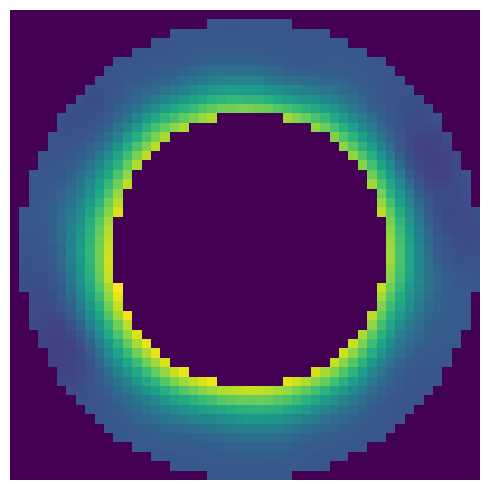

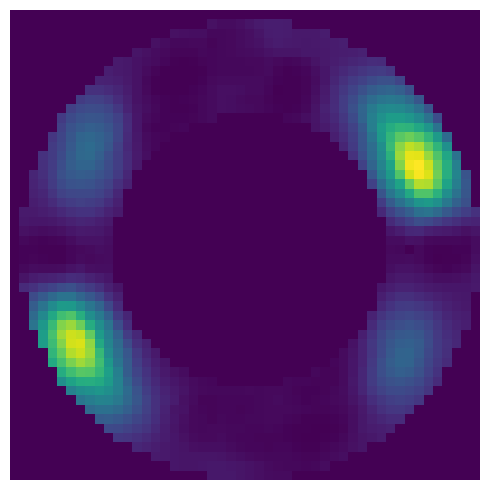

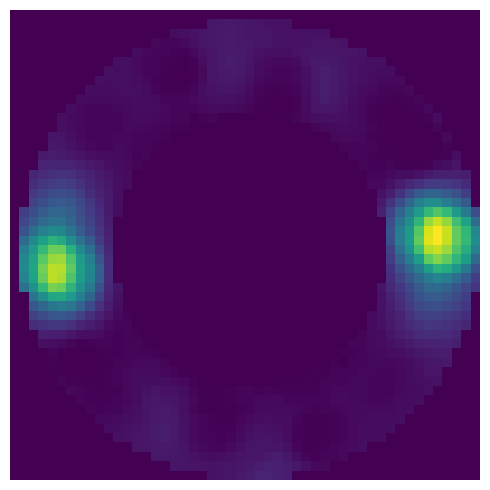

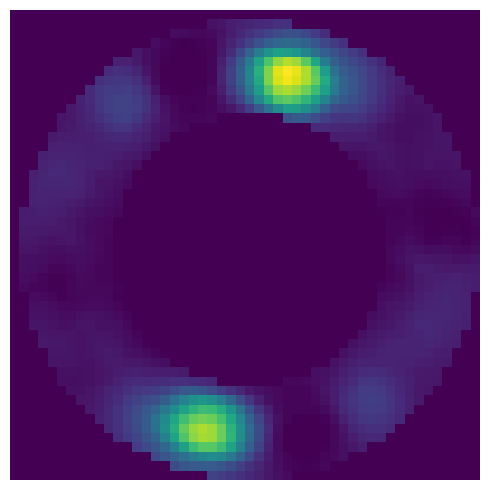

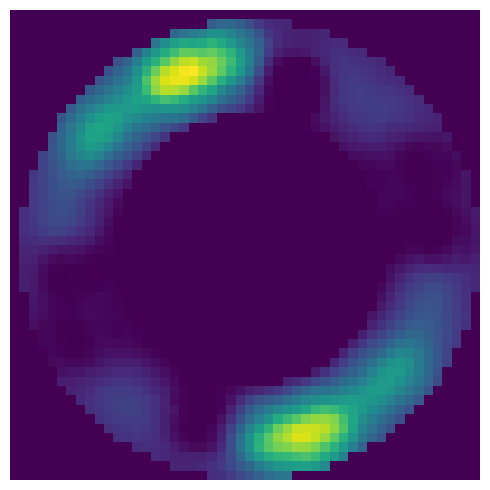

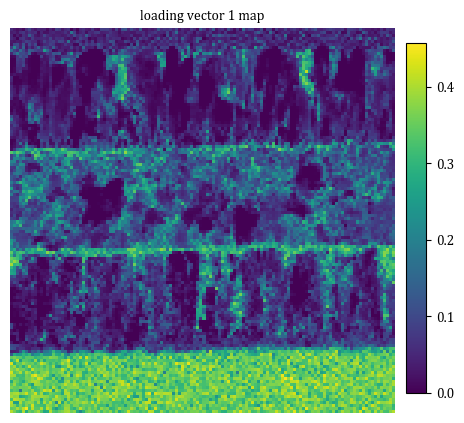

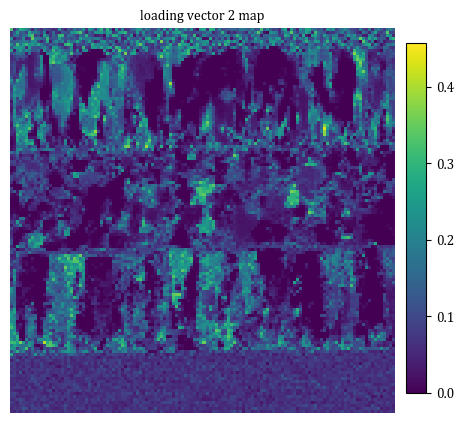

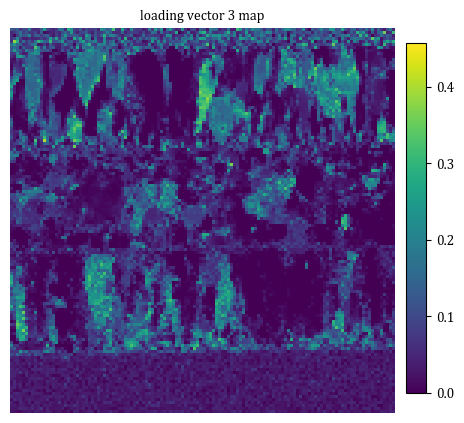

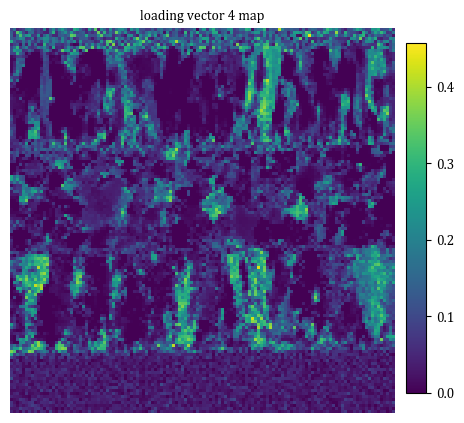

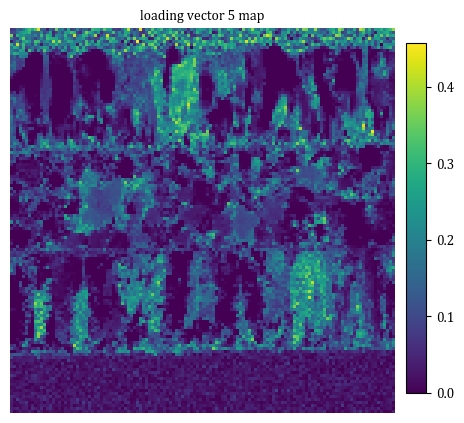

In [9]:
# first decomposition (three options: NMF, PCA, CAE)
run_4DSTEM.ini_DR(method="nmf", num_comp=5, result_visual=True)

1 perplexity 50.0 finished
0.88 min have passed


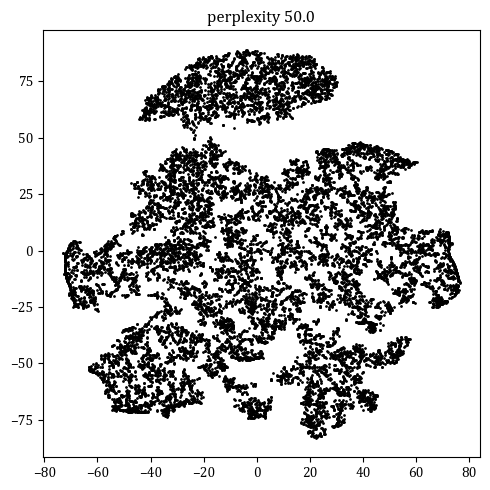

In [10]:
# second decomposition (t-SNE)
run_4DSTEM.aug_DR(2, method="tsne", perplex=[50])

(16384, 2)


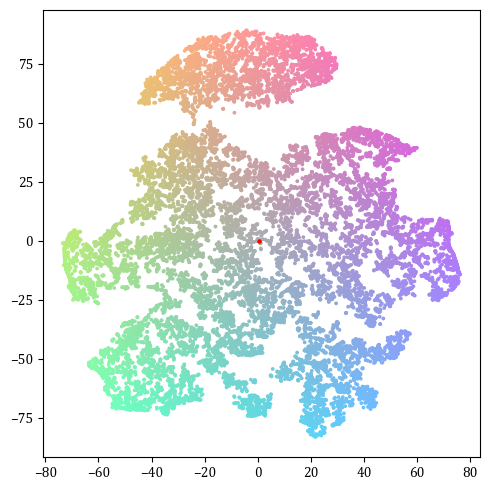

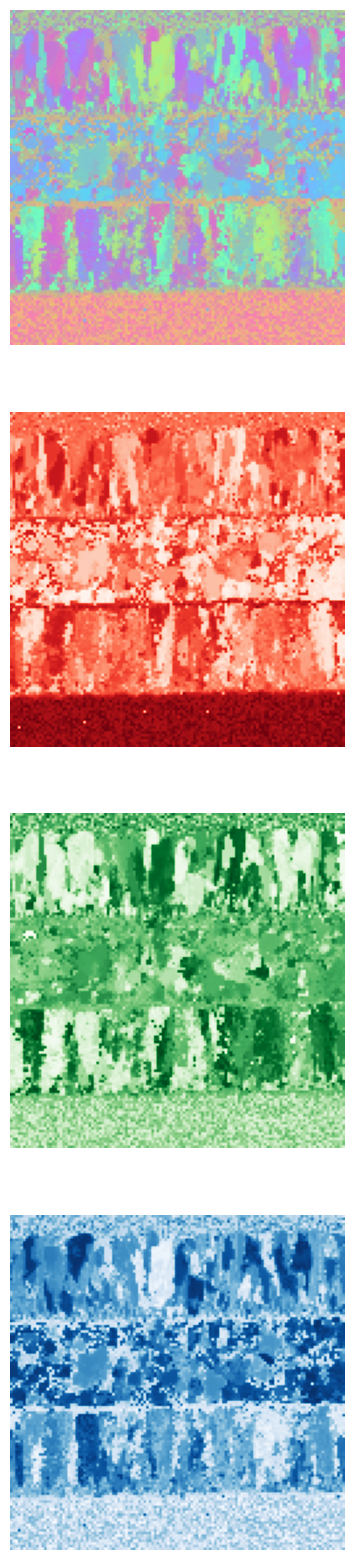

In [11]:
# select and quick-check the final DR space for cluster analysis
# sel_ind: choose one of the DR space created above
run_4DSTEM.prepare_clustering(sel_ind=1, quick_visual=True)

interactive(children=(FloatText(value=0.05, description='min. # of samples in a neighborhood', style=Descripti…

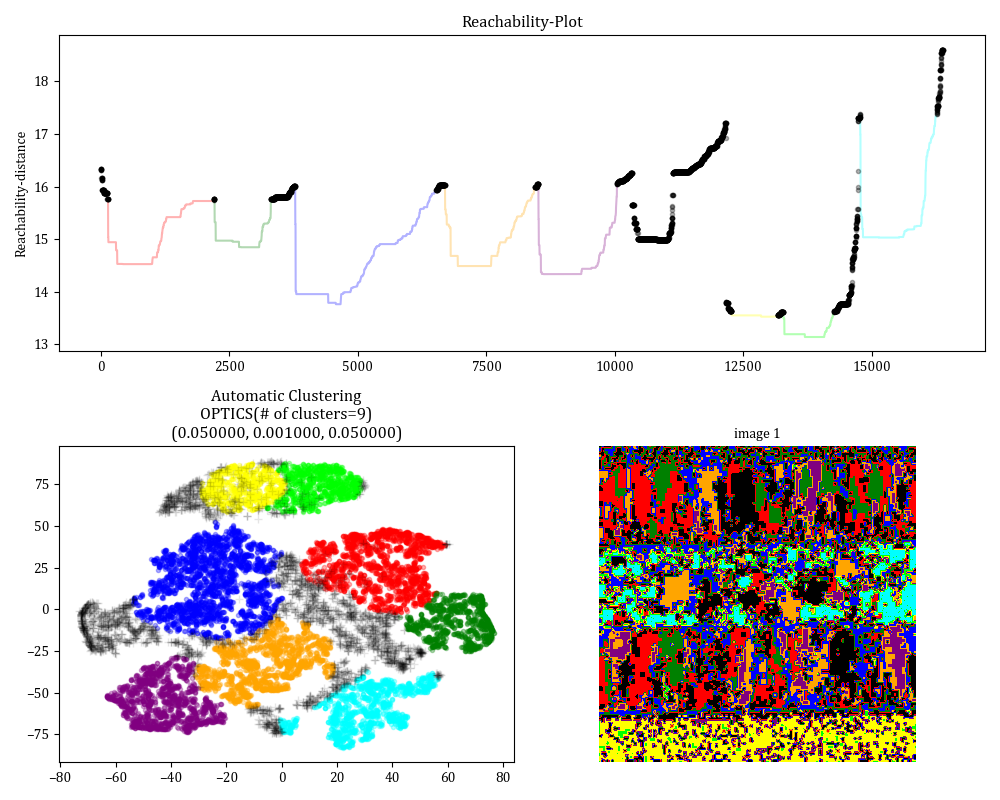

In [12]:
# clustering
%matplotlib widget
run_4DSTEM.cluster_analysis(method="optics")

In [13]:
%matplotlib inline

[-1  0  1  2  3  4  5  6  7]
[3838 2056 1096 2745 1750 1529  897  987 1486]


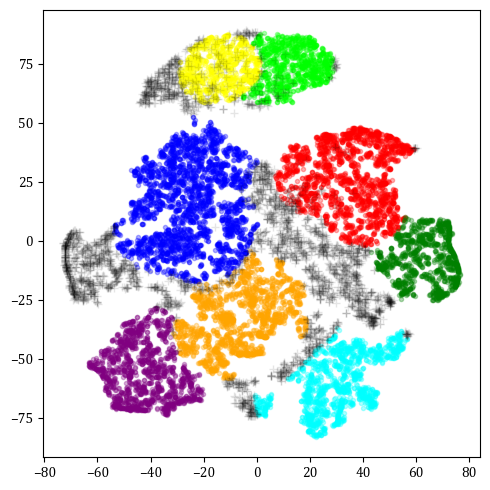

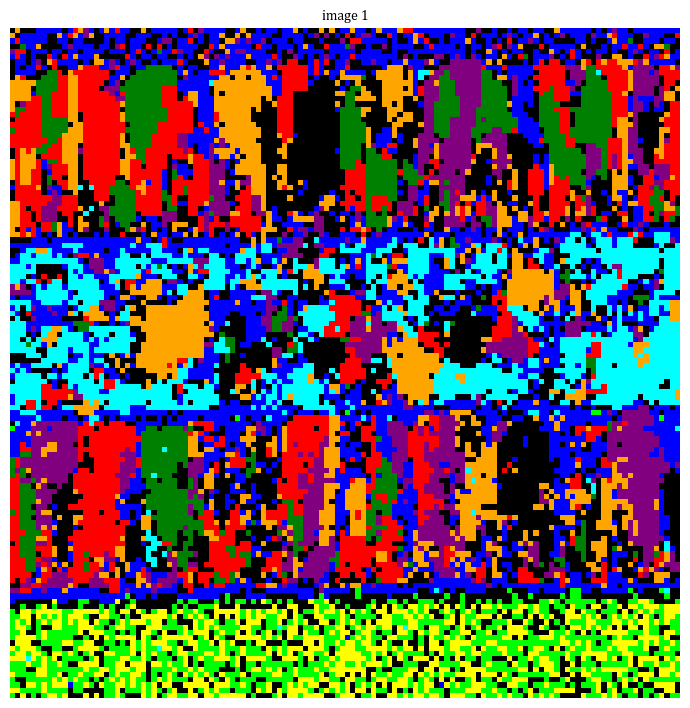

number of pixels in the label -1 cluster: 3838
number of pixels in the label 0 cluster: 2056
number of pixels in the label 1 cluster: 1096
number of pixels in the label 2 cluster: 2745
number of pixels in the label 3 cluster: 1750
number of pixels in the label 4 cluster: 1529
number of pixels in the label 5 cluster: 897
number of pixels in the label 6 cluster: 987
number of pixels in the label 7 cluster: 1486


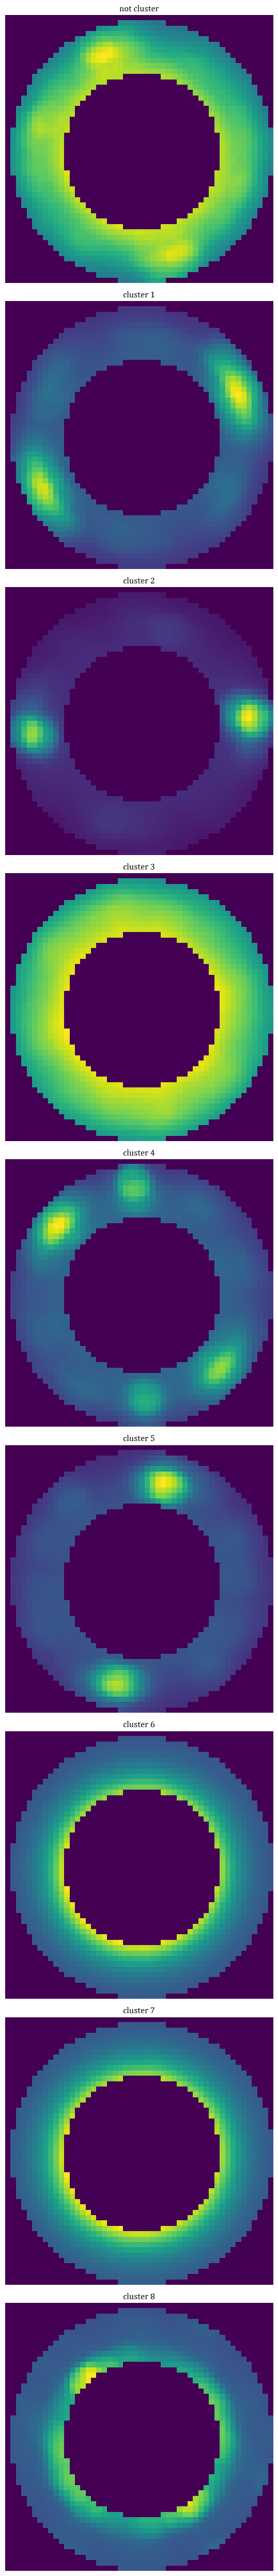

In [14]:
# clustering results (tf_map = True/False map for each cluster)
run_4DSTEM.clustering_result(tf_map=False, log_scale=False)